In [118]:
conda install -c conda-forge rise

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [119]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [120]:
from notebook.services.config import ConfigManager
cm = ConfigManager()

In [123]:
cm.update('livereveal', {
              'width': 1000,
              'height': 600,
              'scroll': True,
              'theme': "sky",
              "backimage": "un-3414149_1920.jpg"
})

SyntaxError: invalid syntax (<ipython-input-123-77b89d5d506f>, line 7)

In [ ]:
import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Campaign Money and Presidential Nominees for Career Ambassadors
## By: Trisha Thompson

The role of career ambassador was created in 1955

And when the role was created - presidential nominees were required to have served a minimum of 15 years in a government agency, including 3 years in a government ministerial role among other requirements.  These specific requirements were repealed with the 1980 Foregin Service Act.  

Recent current events have brought into question the qualifications of recent presidential nominees for ambassadorships along with the intentions of the president and the role of money in the nominee process. 
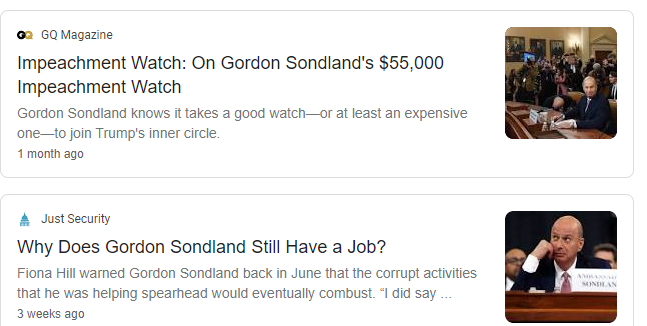

These are just some of the headlines, concerning Trump's nominated ambassador to the UN - Gordon Sondland, a Portland hotel magnate, who donated over 1 million dollars to Donald Trump's presidential campaign (FACT CHECK)

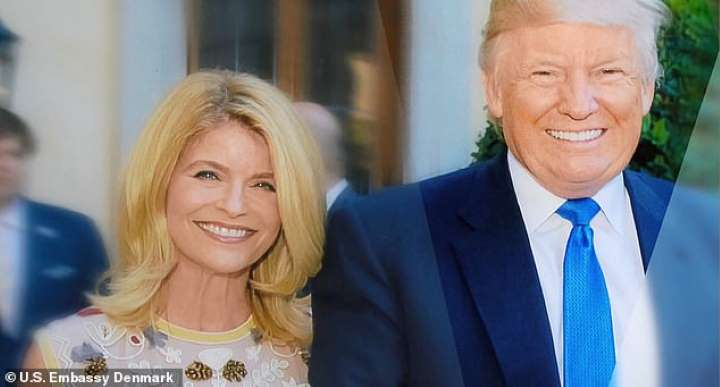

And this is Carla Sands, another Trump nominee, and former actress on The Bold and The Beautiful adn chiropractor and current ambassador to Denmark.  She also donated over $5,000 to Trumps campagin but also donated 100,000 to his inagugural committee fund, hosted fundraisers adn donated another 250,.000 to Trump's vicotry fund

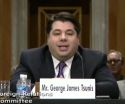George Tunsis - Ambassador to Norwey

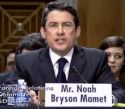Noah Brywon Mamet - Ambassador to Argentina

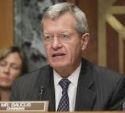Max Baucus - Ambassador to China

### Is there a difference in the size of personal financial contributions from ambassador nominees, who hold fewer traditionally accepted qualifications, to their nominating presidents than nominees who have more experience generally expected of ambassadors?


That is to say...are less qualified nominees more likely to have made large personal financial contributions to their nominating presidents campaign?

## Description of Data Set

- Ryan  Scoville and "Troubling Trends in Ambassadorial Appointments: 1980 to the Present" for lawfareblog.com 

- Presidental Certificates of Demonsrated Competency

- Freedom of Information Act and Obama Administration Policy

- https://ryanscoville.files.wordpress.com/2019/08/data-file-1.xlsx

# Changes to the data set

- Converted to binary point system

- Removed all details

This includes details on graduate degrees...
discuss implication on data set from removing data

- Combined or removed duplicate categories

In [50]:
#Import data set, which has been converted to contain only either "1" or "0" entries.
df  = pd.read_csv('https://raw.githubusercontent.com/trisha311/Trisha/master/Ambassador%20Nominations_Cleaned_12.21.csv?token=ANLJNYSO74OXS4ALGSNOWTK6BEUVQ', encoding = 'cp1252')

In [ ]:
print(df.head(5))

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 17 columns):
Name                                                                       1946 non-null object
Nomination Year                                                            1946 non-null int64
President                                                                  1946 non-null object
Country                                                                    1946 non-null object
Confirmed                                                                  1813 non-null object
Doc No.                                                                    1946 non-null object
Total Personal Contributions by Nominee                                    1826 non-null float64
Graduate Degree                                                            1886 non-null float64
Career FSO                                                                 1944 non-null float64
Career Senior FS           

# Resulting Data Set....

- 1946 entries between nomination years 1981 and 2018 over the span of 6 administrations

## 10 categories for applicable experience and qualifications

   - Graduate Degree

   - Career FSO
   - Career Senior FSO
   - State Department Experience

   - Other Foreign Policy Experience (U.S Gov't)

This column was updated from the original data set to remove all military duty, as military experience is already accounted for in the “Military Experience” column. Experience serving as the Deputy Assistant of Defense (DASD) or with the Department of Defense (DOD) or National Security Council (NSC) is still included under “Other Foreign Policy Experience”. Other examples of experience accounted for under this category are Senior Policy Advisor Roles, UNESCO Ambassadorships, Congressional Seats, and Pearson Fellowships.



- Experience in Organizational Leadership

- Knowledge of Principal Language or Relevant Language Other Than English


  - Experience In or Involving Host Country


This category includes past residence in the host country. It also includes prior experience serving as a political or military officer or Deputy Chief of Mission (DCM), or serving the Central Intelligence Agency (CIA) or United States Agency of International Development (USAID) in or to the host country. This category also includes private sector professional experience with or in the host country, such as serving as the head of an office for a private financial institution within the host country.



  - Experience In or Involving Region


Experience similar to that which is listed above but with reference to either the host country’s region or neighboring countries. This category also includes degrees in the history of the host country’s region and Department of Defense (DOD) and NATO involvement with neighboring countries as well as prior experience on economic councils or as Deputy Council Generals (DCG’s) in the region.

# Addressing Null Data


- Of the applicable data "State Department Experience", "Total Personal Contributions", and "Graduate Degree" contain the most missing information.


- Is there a pattern of data from earlier years being missing?

In [52]:
df.drop(['Confirmed'], axis = 1, inplace=True )
#In order to count the total number of null entries by year in the applicable qualification data, the "Confirmed" column must be removed.  
#It is the only column with null entries, which are not related to the nominees experience and background.

In [53]:
#Create new data set, which groups data by nomination year.
df_by_year = df.groupby(df['Nomination Year'])

In [54]:
df_by_year.get_group(1981).isnull().head(3)

,Name,Nomination Year,President,Country,Doc No.,Total Personal Contributions by Nominee,Graduate Degree,Career FSO,Career Senior FS,State Dept. Experience,Military Experience,Other Foreign Policy Experience (U.S. Gov't),Experience in Organizational Leadership,Knowledge of Principal Language or Relevant Language Other Than English,Experience In or Involving Host Country,Experience In or Involving Region
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


In [55]:
stats.describe(df['Nomination Year'])

DescribeResult(nobs=1946, minmax=(1981, 2018), mean=2000.2199383350462, variance=119.10018837665821, skewness=-0.08027202203796416, kurtosis=-1.1701564868567842)

In [56]:
#Create a dictionary of the total number of null values for each nomination year.
total_nulls = {}
for x in range(1981, 2018):
  total_nulls[x] =  df_by_year.get_group(x).isnull().sum().sum()

Sometimes there is a trend of data being missing from earlier years within the set containing data over long periods of time due to the quality of record keeping and accessibility of the data. 
I will check for any correlation between missing data and the nomination year, since this pattern could potentially siginificatly throw off my data

Text(0, 0.5, 'Number of Missing Values')

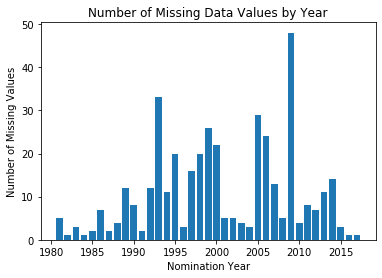

In [57]:
#Plot the total number of missing data entries for each nomination year.
plt.bar(total_nulls.keys(), total_nulls.values())
plt.title("Number of Missing Data Values by Year")
plt.xlabel("Nomination Year")
plt.ylabel("Number of Missing Values")

Based on the chart above, we can see that the number of missing data was particulariy high in 2009 and 1993. It is possible that a variable, which is not captured in this data set, caused data to be more sparsely included in the nominee certificates for these specific years.

Since the image above does not indicate that missing data from the presidential certificates is more plentiful in the earlier years of the data set - we can be assured that the provided data is not skewed in a way where more data is missing from older data in the set.

Since 1993 and 2009 are clearly outliers based on the graph chart above, I will remove these years from the data set for missing entries before calculating the Pearson's R Coefficient.

In [58]:
#Remove 1993 and 2009 from total_nulls dictionary.
del total_nulls[1993]
del total_nulls[2009]

In [59]:
#Calculate Pearson's R
from scipy.stats import pearsonr
nomination_yr = list(total_nulls.keys())
number_nulls = list(total_nulls.values())
pearsonr(nomination_yr, number_nulls)

(0.14826861764495125, 0.3953110994092245)

When looking at the overall trend of missing data over time, there is a very small positive correlation according to the Pearson's Correlation Coefficient calculated above. However these results are not statitistically significant due to the high p-value, which indicates that there is an approximate 40% chance that the results of the Pearson's Correlation Coefficient would be as extreme as 0.16 or more if the data was resampled.

I will also examine whether null data is more prevalent for those nominees who made large donations versus those who did not, by plotting the number of missing data entries by donation amouunt.



In [60]:
#Create new data set, which groups data by Personal Contribution.
df_by_donation = df.groupby(df['Total Personal Contributions by Nominee'])

In [61]:
#Create list of all unique values for "Total Persoanl Contributions by Nominee".
df_by_donation.groups
donation_amounts = list(df_by_donation.groups)
print(donation_amounts)

[0.0, 6.29, 17.16, 23.19, 43.0, 46.0, 52.91, 54.23, 57.98, 58.0, 60.0, 79.55, 96.0, 98.0, 103.24, 105.82, 106.3, 107.99, 114.64, 127.25, 141.0, 143.0, 145.0, 146.3, 148.94, 153.19, 155.91, 169.54, 194.48, 202.0, 209.0, 209.05, 211.65, 222.0, 231.94, 240.0, 255.0, 260.0, 264.45, 275.0, 282.57, 315.0, 347.91, 348.0, 355.0, 398.33, 428.0, 439.0, 447.48, 447.93, 453.05, 480.0, 487.0, 501.0, 506.0, 529.11, 540.0, 565.06, 565.14, 580.0, 605.0, 605.11, 627.0, 709.0, 717.0, 723.0, 775.9, 787.0, 840.0, 861.0, 886.0, 898.0, 932.0, 949.0, 1012.65, 1013.91, 1059.0, 1117.31, 1118.85, 1130.27, 1159.0, 1297.91, 1298.0, 1306.0, 1334.0, 1364.0, 1376.0, 1397.98, 1435.0, 1445.41, 1585.0, 1595.0, 1629.0, 1674.0, 1679.45, 1745.32, 1756.0, 1772.53, 1788.0, 1819.0, 1992.0, 2029.45, 2043.0, 2146.0, 2151.0, 2207.0, 2239.0, 2249.31, 2319.0, 2402.0, 2487.0, 2580.77, 2598.0, 2662.16, 2667.0, 2669.0, 2812.02, 2899.0, 2940.0, 3140.0, 3146.0, 3214.0, 3303.0, 3365.0, 3539.0, 3545.0, 3575.58, 3584.0, 3780.0, 3829.0, 3

In [62]:
#Create a dictionary with the total number of null values for each donation amount.
total_nulls_by_donation = {}
for amount in donation_amounts:
  total_nulls_by_donation[amount] =  df_by_donation.get_group(amount).isnull().sum().sum()

Text(0, 0.5, 'Number of Missing Data Entries')

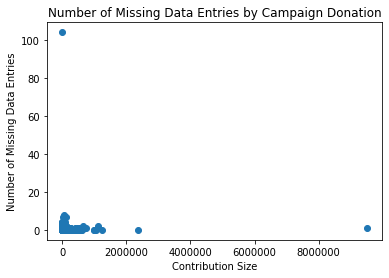

In [63]:
#Plot the number of missing data entries by contribution size from nominee.
nulls_by_donation = list(total_nulls_by_donation.values())
plt.scatter(donation_amounts, nulls_by_donation)
plt.title("Number of Missing Data Entries by Campaign Donation")
plt.xlabel("Contribution Size")
plt.ylabel("Number of Missing Data Entries")


There is significantly more missing data for those nominees who did not donate any money. Since we are more interested in the nominees who did donate money, I will proceed with removing rows where data is missing.

Before removing all null data, I would like to address the null data in the Graduate Degree column. Since the data set was compiled by information gathered from the Presidential Certificates; I assume that if a nominee had a graduate degree that was applicable to their nominated role, this information would be included. Therefore, I have chosen to replace all null data in this colummn with 0.

## Missing Data for Graduate Degree

Replaced all missing data with 0

In [64]:
#Replace all null values for Graduate Degree with 0
df['Graduate Degree'].fillna(0, inplace=True)

In [65]:
#Remove rows with null values in any of the qualification or experience columns or personal contribution column.
columns = ('Total Personal Contributions by Nominee', 'Graduate Degree', 'Career FSO', 'Career Senior FS', 'State Dept. Experience', 'Military Experience', "Other Foreign Policy Experience (U.S. Gov't)", 'Experience in Organizational Leadership', 'Knowledge of Principal Language or Relevant Language Other Than English', 'Experience In or Involving Host Country', 'Experience In or Involving Region')
df.dropna(subset=columns, inplace=True)

In [66]:
#Review information from updated dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1590 entries, 0 to 1945
Data columns (total 16 columns):
Name                                                                       1590 non-null object
Nomination Year                                                            1590 non-null int64
President                                                                  1590 non-null object
Country                                                                    1590 non-null object
Doc No.                                                                    1590 non-null object
Total Personal Contributions by Nominee                                    1590 non-null float64
Graduate Degree                                                            1590 non-null float64
Career FSO                                                                 1590 non-null float64
Career Senior FS                                                           1590 non-null float64
State Dept. Experience    

Since the data set was compiled by information gathered from the Presidential Certificates; I assume that if a nominee had a graduate degree that was applicable to their nominated role, this information would be included. Therefore, I have chosen to replace all null data in this colummn with 0.

# Review of the Nominees' Campaign Contributions by President


In [67]:
#Find maximum contribution size from data frame.
(df['Total Personal Contributions by Nominee'].max())

2361355.11

- The largest donation in the data set was $2,361,355.11 made by Donald Manchester to President Trump.

He had a total qualification score or 2, and his nomination was recalled by Trump in November of 2019

- Over 80% of nominees did not make any personal financial contributions to their nominating president.

In [126]:
print(df['Total Personal Contributions by Nominee'].value_counts())

0.00         1298
415457.00       7
211.65          5
1130.27         5
787.00          5
23178.00        4
6.29            4
114.64          3
3584.00         3
3365.00         3
143.00          3
1819.00         2
120699.00       2
146198.00       2
3146.00         2
52.91           2
949.00          2
34315.00        2
143849.00       2
3545.00         2
126380.68       2
23.19           2
315.00          2
540.00          2
310478.00       2
4021.12         1
336162.00       1
1306.00         1
4805.00         1
398.33          1
             ... 
17061.00        1
120970.00       1
4859.00         1
153371.00       1
215903.00       1
3539.00         1
146.30          1
1013.91         1
15701.00        1
194.48          1
95120.10        1
155.91          1
74401.00        1
3780.00         1
501.00          1
5410.11         1
65692.00        1
35149.00        1
9843.00         1
453.05          1
775.90          1
607396.00       1
6778.00         1
80020.00        1
57.98     

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1590 entries, 0 to 1589
Data columns (total 17 columns):
Name                                                                       1590 non-null object
Nomination Year                                                            1590 non-null int64
President                                                                  1590 non-null object
Country                                                                    1590 non-null object
Doc No.                                                                    1590 non-null object
Total Personal Contributions by Nominee                                    1590 non-null float64
Graduate Degree                                                            1590 non-null float64
Career FSO                                                                 1590 non-null float64
Career Senior FS                                                           1590 non-null float64
State Dept. Experience    

In [128]:
1298/1590

0.8163522012578617

In [131]:
print(df['Total Personal Contributions by Nominee'].mean())

14356.203062893084


- The average total personal contribution was $14,356.20

Text(0, 0.5, 'Number of Nominees')

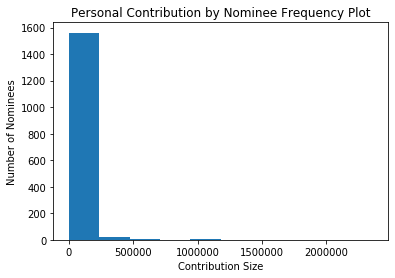

In [70]:
#Examine the distribution of the contribution sizes by creating a frequency plot for the "Total Persoanl Contributions by Nominee" category.
plt.hist(df['Total Personal Contributions by Nominee'])
plt.title('Personal Contribution by Nominee Frequency Plot')
plt.xlabel('Contribution Size')
plt.ylabel('Number of Nominees')

In [71]:
#Calculate descriptive statistics for the contribution size.
stats.describe(df['Total Personal Contributions by Nominee'])

DescribeResult(nobs=1590, minmax=(0.0, 2361355.11), mean=14356.20306289308, variance=9023510080.093437, skewness=14.207171640228454, kurtosis=278.0235846850418)

The frequency plot above indicates that by far, most nominees did not make personal donations to the campaigns of their nominating Presidents. Futhermore "Total Personal Campaign Contributions" is not normally distributed.

While the hypothesis of this research project concerns the correlation between donations and nominee qualifications, this question was brought about by the current events concerning the Trump administration. Therefore, I will also take a look at the data for campaign contributions made by nominees grouped by President.

In [72]:
# Create different data sets for each president.
reagan = df['President'] == 'Reagan'
df_reagan = df.loc[reagan]

bush_sr = df['President'] == 'Bush Sr.'
df_bush_sr  = df.loc[bush_sr]

clinton = df['President'] == 'Clinton'
df_clinton = df.loc[clinton]

bush_jr = df['President'] == 'Bush Jr.'
df_bush_jr = df.loc[bush_jr]

obama = df['President'] == 'Obama'
df_obama = df.loc[obama]

trump = df['President'] == 'Trump'
df_trump = df.loc[trump]


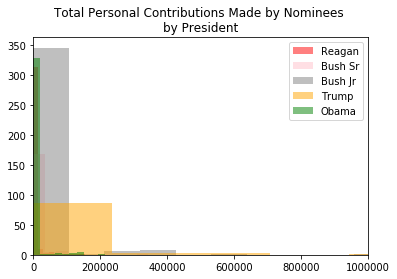

In [73]:
#Plot the frequency of each contribution amountby president.
import pylab
plt.hist(df_reagan['Total Personal Contributions by Nominee'], color = 'red', alpha = 0.5)
plt.hist(df_bush_sr['Total Personal Contributions by Nominee'], color = 'pink', alpha = 0.5)
plt.hist(df_bush_jr['Total Personal Contributions by Nominee'], color = 'grey', alpha = 0.5)
plt.hist(df_trump['Total Personal Contributions by Nominee'], color = 'orange', alpha = 0.5)
plt.hist(df_obama['Total Personal Contributions by Nominee'], color = 'green', alpha = 0.5)
plt.title('Total Personal Contributions Made by Nominees \nby President')
plt.legend(['Reagan','Bush Sr', 'Bush Jr', 'Trump', 'Obama'])
pylab.xlim([0,1000000])
plt.show()

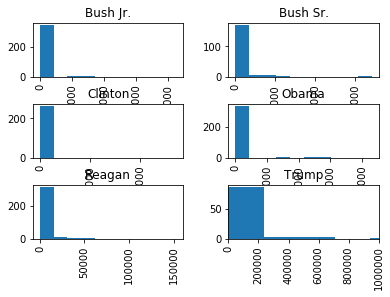

In [74]:
#Since the above graph is somewhat difficult to decipher, I have plotted each frequencey plot for each president below separately and reduced the size of the x-axis to include only contributions between $0.00 and $250,000.
df['Total Personal Contributions by Nominee'].hist(by=df['President'])
pylab.xlim([0,1000000])
plt.show()

In addition to reveiwing the distribution of the contribution data by president, an analysis of the average and total contributions made by nominees per president is included as follows:

In [75]:
#Create new data frame with averages of data by President.

df_by_president=df.groupby(df['President']).mean()

In [76]:
print(df_by_president)

           Nomination Year  Total Personal Contributions by Nominee  \
President                                                             
Bush Jr.       2004.235616                             23749.147781   
Bush Sr.       1990.407609                              9759.334783   
Clinton        1995.996226                              3055.626491   
Obama          2012.419825                              5165.911837   
Reagan         1984.375740                              4274.411598   
Trump          2017.421053                             87745.330842   

           Graduate Degree  Career FSO  Career Senior FS  \
President                                                  
Bush Jr.          0.736986    0.843836          0.827397   
Bush Sr.          0.222826    0.722826          0.706522   
Clinton           0.694340    0.849057          0.833962   
Obama             0.758017    0.874636          0.836735   
Reagan            0.227811    0.680473          0.544379   
Trump      

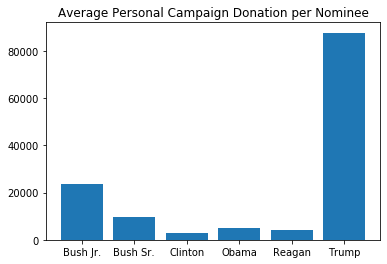

In [77]:
#Plot bar graph of average contribution size by president.
plt.bar(df_by_president.index, df_by_president['Total Personal Contributions by Nominee'])
plt.title('Average Personal Campaign Donation per Nominee')
plt.show()

In [78]:
#Create new data frame with totals of data by President.
df_by_president_totals = df.groupby(df['President']).sum()

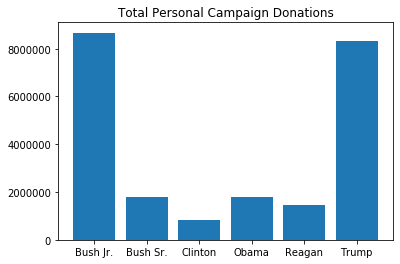

In [79]:
plt.bar(df_by_president_totals.index, df_by_president_totals['Total Personal Contributions by Nominee'])
plt.title('Total Personal Campaign Donations')
plt.show()

In [80]:
#Calculate standard deviations for both Bush Jr's and Trumps nominee contributions due to the significant difference in their nominee's average contribution in comparison to toal contributions 
#made by their nominees to their campaigns.
print(df_bush_jr['Total Personal Contributions by Nominee'].std())
print(df_trump['Total Personal Contributions by Nominee'].std())

107018.5274749744
305749.11543165264


While on average those nominated by Donald Trump had individually donated larger sums of money to his presidential campaign than those nominated by any other president in the data set; George W Bush received the highest total donations from those he nominated for amabassadorial seats. This indicates that either more nominees doanted to Trump than Bush Jr. and/or there are some outlier donation amounts that were made to Bush Jr's campaign

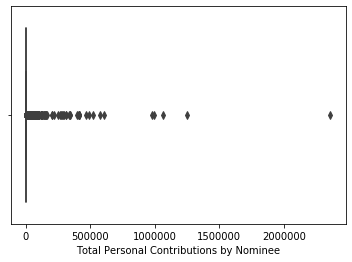

In [81]:
#Create boxplot to check for presence of outliers in "Total Persoanl Contributions by Nominee" category.
import seaborn as sns
sns.boxplot(x=df['Total Personal Contributions by Nominee'])

Based on the boxplot of all entries for "Total Personal Contributions by Nominee" there are definitely outliers in this data set. These outliers will need to be removed.

In [82]:
#Find z scores for all entries in 'Total Persoanl Contributions by Nominee'
df = df.assign(donation_zscore=stats.zscore(df['Total Personal Contributions by Nominee']))

In [83]:
#Find rows for z scores that are greater than 3
print(np.where(df['donation_zscore']>3))

(array([ 378,  423,  810,  812,  817,  818,  819,  820,  821,  822,  823,
        824,  825,  853,  983, 1495, 1501, 1502, 1507, 1544, 1547, 1556,
       1566], dtype=int64),)


In [84]:
#Rest index, since null values have been removed and have left gaps in the index.
df = df.reset_index(drop=True)

In [85]:
#Remove outlier rows identified in array above.
df_new = df.drop([378,  423,  810,  812,  817,  818,  819,  820,  821,  822,  823,
        824,  825,  853,  983, 1495, 1501, 1502, 1507, 1544, 1547, 1556,
       1566])

In [86]:
#Review info for updated data set, which no longer contains any null data entries.
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1567 entries, 0 to 1589
Data columns (total 17 columns):
Name                                                                       1567 non-null object
Nomination Year                                                            1567 non-null int64
President                                                                  1567 non-null object
Country                                                                    1567 non-null object
Doc No.                                                                    1567 non-null object
Total Personal Contributions by Nominee                                    1567 non-null float64
Graduate Degree                                                            1567 non-null float64
Career FSO                                                                 1567 non-null float64
Career Senior FS                                                           1567 non-null float64
State Dept. Experience    

# Exploration of Nominee Qualification and Experience


With the missing data either removed or adjusted and the outlier values for personal contributions removed, the 10 categories for experience and qualififcation can be added together to create a single score to measure a candidates qualifications from 1 to 10 based on the traditional experience applicable to Career Ambassadors.

In [87]:
#Create new column in dataframe for total score.
df_new = df.assign(total_qualification_score = (df_new['Graduate Degree'] + df_new['Career FSO'] + df_new['State Dept. Experience'] + df_new['Military Experience'] + df_new["Other Foreign Policy Experience (U.S. Gov't)"] + df_new["Experience in Organizational Leadership"] + df_new['Knowledge of Principal Language or Relevant Language Other Than English'] + df_new['Experience In or Involving Host Country'] + df_new['Experience In or Involving Region']))                                           

In [88]:
df_new.head(3)

,Name,Nomination Year,President,Country,Doc No.,Total Personal Contributions by Nominee,Graduate Degree,Career FSO,Career Senior FS,State Dept. Experience,Military Experience,Other Foreign Policy Experience (U.S. Gov't),Experience in Organizational Leadership,Knowledge of Principal Language or Relevant Language Other Than English,Experience In or Involving Host Country,Experience In or Involving Region,donation_zscore,total_qualification_score
0,"Arthur W. Hummel, Jr.",1981,Reagan,China,C04690229,0.00,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1,1,-0.151178,6.0
1,Thomas R. Pickering,1981,Reagan,Nigeria,C06121843,0.00,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0,1,-0.151178,5.0
2,William L. Swing,1981,Reagan,Liberia,C06121871,6.29,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0,1,-0.151112,4.0


In [89]:
#Find descriptive statistics for the Total Qualification Score.
stats.describe(df_new['total_qualification_score'])

DescribeResult(nobs=1590, minmax=(nan, nan), mean=nan, variance=nan, skewness=nan, kurtosis=nan)

In [92]:
df_new['total_qualification_score'].mean()

5.045309508615189

In [91]:
df_new['total_qualification_score'].median()

5.0

In [90]:
df_new['total_qualification_score'].std()

1.4463109863640427

Since the median and mean of the Total Qualification Score are nearly the same, this data is most likely normally distributed. The skewness and kurtosis of this variable shown above support this.

C:\Users\Trisha\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Trisha\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0, 0.5, 'Total Number of Nominees from 1981 to 2018')

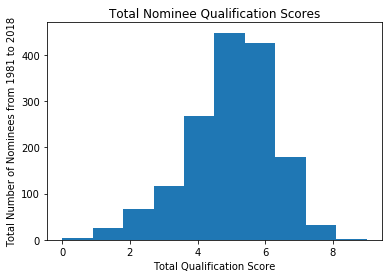

In [93]:
plt.hist(df_new['total_qualification_score'])
plt.title('Total Nominee Qualification Scores')
plt.xlabel('Total Qualification Score')
plt.ylabel('Total Number of Nominees from 1981 to 2018')

The histogram above confirms that the Total Qualification Scores are normally distributed.

Again, while the hypothesis of this research project concerns possible correlations between personal financial contribution and nominee qualifications; I have also included analysis of some of the nominee qualifications by president due to the origin of the original hypthesis from current events.

In [94]:
#Update df_by_president_totals to be based on udpated dataframe without nulls or outliers
df_by_president_totals = df_new.groupby(df['President']).sum()

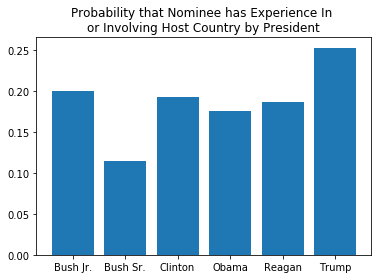

In [95]:
plt.bar(df_by_president.index, df_by_president['Experience In or Involving Host Country'])
plt.title('Probability that Nominee has Experience In \nor Involving Host Country by President')
plt.show()

Text(0.5, 1.0, 'Probability Nominee has Knowledge of Principle Language \n or Relevant Language (Other than English)')

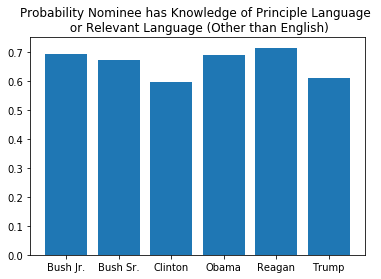

In [103]:
plt.bar(df_by_president.index, df_by_president['Knowledge of Principal Language or Relevant Language Other Than English'])
plt.title('Probability Nominee has Knowledge of Principle Language \n or Relevant Language (Other than English)')

Text(0.5, 1.0, 'Probability Nominee has Graduate Degree \nor Higher by President ')

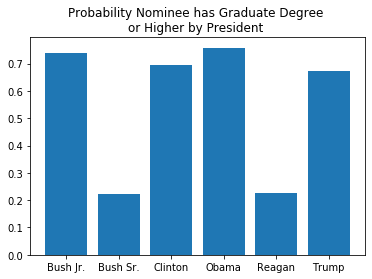

In [96]:
plt.bar(df_by_president.index, df_by_president['Graduate Degree'])
plt.title('Probability Nominee has Graduate Degree \nor Higher by President ')

Text(0.5, 1.0, 'Probability Nominee has Foreign Service Experience')

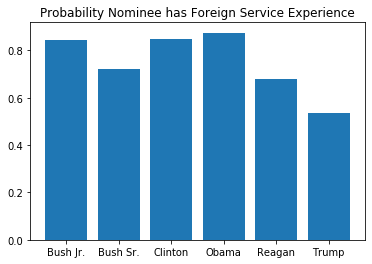

In [97]:
plt.bar(df_by_president.index, df_by_president['Career FSO'])
plt.title('Probability Nominee has Foreign Service Experience')

Text(0.5, 1.0, 'Probability Nominee held Senior Role in Foreign Service')

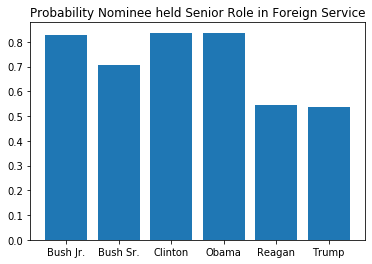

In [98]:
plt.bar(df_by_president.index, df_by_president['Career Senior FS'])
plt.title('Probability Nominee held Senior Role in Foreign Service')

Text(0.5, 1.0, 'Probability Nominee has Prior Experience in the State Dept.')

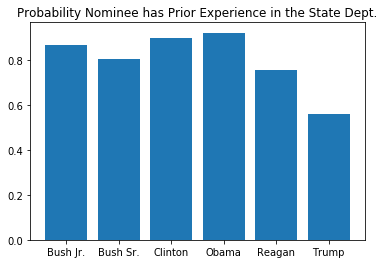

In [99]:
plt.bar(df_by_president.index, df_by_president['State Dept. Experience'])
plt.title('Probability Nominee has Prior Experience in the State Dept.')

Text(0.5, 1.0, 'Probability Nominee has Prior Experience in the US Military')

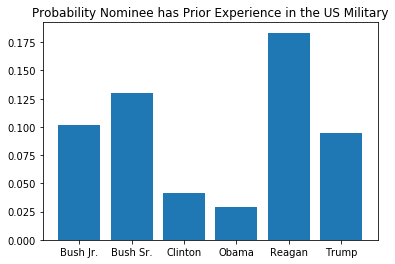

In [100]:
plt.bar(df_by_president.index, df_by_president['Military Experience'])
plt.title('Probability Nominee has Prior Experience in the US Military')

Text(0.5, 1.0, 'Probability Nominee has Prior Experience \n in Organizational Leadership')

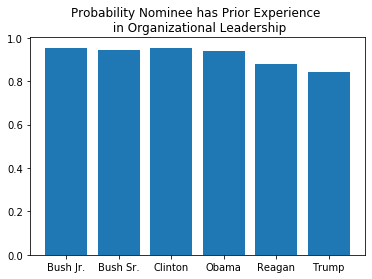

In [101]:
plt.bar(df_by_president.index, df_by_president['Experience in Organizational Leadership'])
plt.title('Probability Nominee has Prior Experience \n in Organizational Leadership')

Text(0.5, 1.0, 'Probability Nominee has Prior Experience In \n or Involving Region of Host Country')

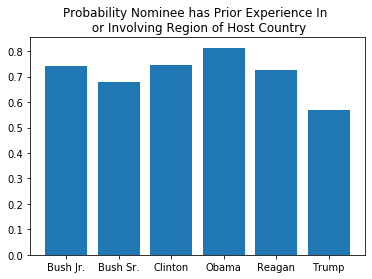

In [102]:
plt.bar(df_by_president.index, df_by_president['Experience In or Involving Region'])
plt.title('Probability Nominee has Prior Experience In \n or Involving Region of Host Country')

Text(0.5, 1.0, 'Probability Nominee has Foreign Policy Experience \n (other than State Department Experience or Military Service)')

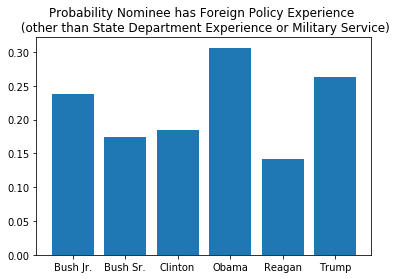

In [104]:
plt.bar(df_by_president.index, df_by_president["Other Foreign Policy Experience (U.S. Gov't)"])
plt.title('Probability Nominee has Foreign Policy Experience \n (other than State Department Experience or Military Service)')


In [105]:
df_by_president=df_new.groupby(df_new['President']).mean()
print(df_by_president)

           Nomination Year  Total Personal Contributions by Nominee  \
President                                                             
Bush Jr.       2004.235616                             23749.147781   
Bush Sr.       1990.407609                              9759.334783   
Clinton        1995.996226                              3055.626491   
Obama          2012.419825                              5165.911837   
Reagan         1984.375740                              4274.411598   
Trump          2017.421053                             87745.330842   

           Graduate Degree  Career FSO  Career Senior FS  \
President                                                  
Bush Jr.          0.736986    0.843836          0.827397   
Bush Sr.          0.222826    0.722826          0.706522   
Clinton           0.694340    0.849057          0.833962   
Obama             0.758017    0.874636          0.836735   
Reagan            0.227811    0.680473          0.544379   
Trump      

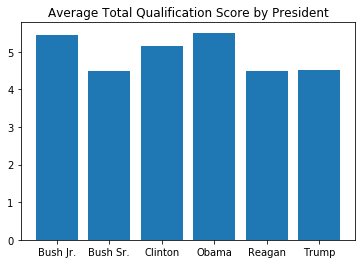

In [106]:
plt.bar(df_by_president.index, df_by_president['total_qualification_score'])
plt.title('Average Total Qualification Score by President')
plt.show()

In [107]:
#List each average qualification score by President.
print(df_by_president['total_qualification_score'])

President
Bush Jr.    5.451705
Bush Sr.    4.483516
Clinton     5.158491
Obama       5.507289
Reagan      4.500000
Trump       4.528736
Name: total_qualification_score, dtype: float64


-On average Barack Obama's nominess had the highest qualification scores followed by those nominated by George W. Bush. (which is contrary to some of the anecdotal news stories from Obama's nominees)
-Likewise on average those nominated by Ronald Reagan and Donald Trump scored lower based on the 10 experience and qualification categories. 

-However, Trump nominees were more likely to have had prior experience in or with their host country but were also least likely to have prior Foreign Service, State Department, or Organizational Leadership experience (which aligns with his campain message to drain the swamp)

-Meanwhile Obama's nominees were least likely to have had a military background, and those nomined by Reagan and Bush Sr were least likely to have graduate degrees.



# Correlation between Total Qualification Score and Average Personal Contribution to Nominating President

In [108]:
#Group data by Total Qualification Score Value
df_by_score = df_new.groupby(df_new['total_qualification_score']).mean()

Text(0.5, 1.0, 'Average Campaign Contribution by Qualifification Score')

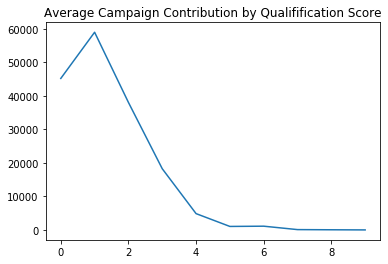

In [109]:
#Plot average contribution by total score.
plt.plot(df_by_score.index, df_by_score['Total Personal Contributions by Nominee'])
plt.title('Average Campaign Contribution by Qualifification Score')

There is clearly a negative trend between total qualification score and the average personal campaign donation based on the graph above.

In [110]:
stats.pearsonr(df_by_score.index, df_by_score['Total Personal Contributions by Nominee'])

(-0.8716538706329234, 0.0010139175139649574)

Based on the Pearson's Correlation Coefficient above, there is a statistically significant negative correlation between a nominees total qualification sore and the size of the donation that they made to their nominating president.

Although we have analyised the aggregate relationship between qualification score and the nominee's financial contribution; I would still like to review this same relationship separated by president.



In [111]:
#Create new data sets by president, based on final data from which nulls were either removed or udpated and outliers were addressed.
reagan1 = df_new['President'] == 'Reagan'
df_reagan1 = df_new.loc[reagan1]

bush_sr1 = df_new['President'] == 'Bush Sr.'
df_bush_sr1 = df_new.loc[bush_sr1]

clinton1 = df_new['President'] == 'Clinton'
df_clinton1 = df_new.loc[clinton1]

bush_jr1 = df_new['President'] =='Bush Jr.'
df_bush_jr1 = df_new.loc[bush_jr1]

obama1 = df_new['President'] == 'Obama'
df_obama1 = df_new.loc[obama1]

trump1 = df_new['President'] == 'Trump'
df_trump1 = df_new.loc[trump1]

In [112]:
#Recalculate the total qualification for each updated data set for each president.
df_reagan1.assign(total_qualification_score = (df_reagan1['Graduate Degree'] + df_reagan1['Career FSO'] + df_reagan1['State Dept. Experience'] + df_reagan1['Military Experience'] + df_reagan1["Other Foreign Policy Experience (U.S. Gov't)"] + df_reagan1["Experience in Organizational Leadership"] + df_reagan1['Knowledge of Principal Language or Relevant Language Other Than English'] + df_reagan1['Experience In or Involving Host Country'] + df_reagan1['Experience In or Involving Region']))        
df_bush_sr1.assign(total_qualification_score = (df_bush_sr1['Graduate Degree'] + df_bush_sr1['Career FSO'] + df_bush_sr1['State Dept. Experience'] + df_bush_sr1['Military Experience'] + df_bush_sr1["Other Foreign Policy Experience (U.S. Gov't)"] + df_bush_sr1["Experience in Organizational Leadership"] + df_bush_sr1['Knowledge of Principal Language or Relevant Language Other Than English'] + df_bush_sr1['Experience In or Involving Host Country'] + df_bush_sr1['Experience In or Involving Region']))        
df_clinton1.assign(total_qualification_score = (df_clinton1['Graduate Degree'] + df_clinton1['Career FSO'] + df_clinton1['State Dept. Experience'] + df_clinton1['Military Experience'] + df_clinton1["Other Foreign Policy Experience (U.S. Gov't)"] + df_clinton1["Experience in Organizational Leadership"] + df_clinton1['Knowledge of Principal Language or Relevant Language Other Than English'] + df_clinton1['Experience In or Involving Host Country'] + df_clinton1['Experience In or Involving Region']))        
df_bush_jr1.assign(total_qualification_score = (df_bush_jr1['Graduate Degree'] + df_bush_jr1['Career FSO'] + df_bush_jr1['State Dept. Experience'] + df_bush_jr1['Military Experience'] + df_bush_jr1["Other Foreign Policy Experience (U.S. Gov't)"] + df_bush_jr1["Experience in Organizational Leadership"] + df_bush_jr1['Knowledge of Principal Language or Relevant Language Other Than English'] + df_bush_jr1['Experience In or Involving Host Country'] + df_bush_jr1['Experience In or Involving Region']))        
df_obama1.assign(total_qualification_score = (df_obama1['Graduate Degree'] + df_obama1['Career FSO'] + df_obama1['State Dept. Experience'] + df_obama1['Military Experience'] + df_obama1["Other Foreign Policy Experience (U.S. Gov't)"] + df_obama1["Experience in Organizational Leadership"] + df_obama1['Knowledge of Principal Language or Relevant Language Other Than English'] + df_obama1['Experience In or Involving Host Country'] + df_obama1['Experience In or Involving Region']))   
df_trump1.assign(total_qualification_score = (df_trump1['Graduate Degree'] + df_trump1['Career FSO'] + df_trump1['State Dept. Experience'] + df_trump1['Military Experience'] + df_trump1["Other Foreign Policy Experience (U.S. Gov't)"] + df_trump1["Experience in Organizational Leadership"] + df_trump1['Knowledge of Principal Language or Relevant Language Other Than English'] + df_trump1['Experience In or Involving Host Country'] + df_trump1['Experience In or Involving Region']))             

,Name,Nomination Year,President,Country,Doc No.,Total Personal Contributions by Nominee,Graduate Degree,Career FSO,Career Senior FS,State Dept. Experience,Military Experience,Other Foreign Policy Experience (U.S. Gov't),Experience in Organizational Leadership,Knowledge of Principal Language or Relevant Language Other Than English,Experience In or Involving Host Country,Experience In or Involving Region,donation_zscore,total_qualification_score
1492,John Bass,2017,Trump,Afghanistan,Online,0.00,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0,1,-0.151178,4.0
1493,John Desrocher,2017,Trump,Algeria,Online,0.00,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0,1,-0.151178,5.0
1494,Nina Maria Fite,2017,Trump,Angola,Online,0.00,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1,0,-0.151178,6.0
1495,Douglas Manchester,2017,Trump,Bahamas,Online,2361355.11,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0,24.715064,2.0
1496,Justin Hicks Siberell,2017,Trump,Bahrain,Online,0.00,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0,1,-0.151178,6.0
1497,Peter Henry Barlerin,2017,Trump,Cameroon,Online,0.00,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0,1,-0.151178,6.0
1498,Kelly Craft,2017,Trump,Canada,Online,11678.25,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,0,-0.028200,2.0
1499,Terry Branstad,2017,Trump,China,Online,1012.65,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1,0,-0.140514,4.0
1500,Sharon Day,2017,Trump,Costa Rica,Online,288896.10,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,1,2.891042,2.0
1501,Robert Kohorst,2017,Trump,Croatia,Online,1251026.55,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,1,13.022753,3.0


In [113]:
#Group new data sets for each president by score.
df_reagan1_by_score = df_reagan1.groupby(df_reagan1['total_qualification_score']).mean()
df_bush_sr1_by_score = df_bush_sr1.groupby(df_bush_sr1['total_qualification_score']).mean()
df_clinton1_by_score = df_clinton1.groupby(df_clinton1['total_qualification_score']).mean()
df_bush_jr1_by_score = df_bush_jr1.groupby(df_bush_jr1['total_qualification_score']).mean()
df_obama1_by_score = df_obama1.groupby(df_obama1['total_qualification_score']).mean()
df_trump1_by_score = df_trump1.groupby(df_trump1['total_qualification_score']).mean()

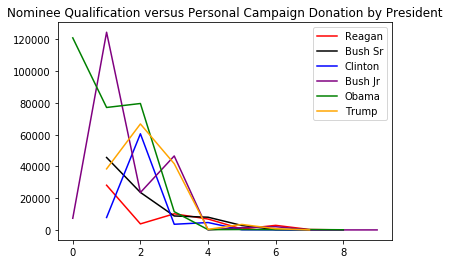

In [115]:
#Plot average donation per total qualification score by president.
plt.plot(df_reagan1_by_score.index, df_reagan1_by_score['Total Personal Contributions by Nominee'], color = 'red')
plt.plot(df_bush_sr1_by_score.index, df_bush_sr1_by_score['Total Personal Contributions by Nominee'], color = 'black')
plt.plot(df_clinton1_by_score.index, df_clinton1_by_score['Total Personal Contributions by Nominee'], color = 'blue')
plt.plot(df_bush_jr1_by_score.index, df_bush_jr1_by_score['Total Personal Contributions by Nominee'], color = 'purple')
plt.plot(df_obama1_by_score.index, df_obama1_by_score['Total Personal Contributions by Nominee'], color = 'green')
plt.plot(df_trump1_by_score.index, df_trump1_by_score['Total Personal Contributions by Nominee'], color = 'orange')
plt.title('Nominee Qualification versus Personal Campaign Donation by President')
plt.legend(['Reagan', 'Bush Sr', 'Clinton', 'Bush Jr', 'Obama', 'Trump'])
plt.show()


In [ ]:
print('Pearson Correlation Coefficients')
print('Regan: {}'.format(stats.pearsonr(df_reagan1_by_score.index, df_reagan1_by_score['Total Personal Contributions by Nominee'])))
print('Bush Sr.: {}'.format(stats.pearsonr(df_bush_sr1_by_score.index, df_bush_sr1_by_score['Total Personal Contributions by Nominee'])))
print('Clinton: {}'.format(stats.pearsonr(df_clinton1_by_score.index, df_clinton1_by_score['Total Personal Contributions by Nominee'])))
print('Bush Jr.: {}'.format(stats.pearsonr(df_bush_jr1_by_score.index, df_bush_jr1_by_score['Total Personal Contributions by Nominee'])))
print('Obama: {}'.format(stats.pearsonr(df_obama1_by_score.index, df_obama1_by_score['Total Personal Contributions by Nominee'])))
print('Tump: {}'.format(stats.pearsonr(df_trump1_by_score.index, df_trump1_by_score['Total Personal Contributions by Nominee'])))

Based on the Pearson Correlation Coefficients listed above those nominated by Bush Sr, Barrack Obama, and Donald Trump have the most negative correlation between the amount of money that they donated and the tallied qualification score. The correlating p-value for each of the three Pearson's R values indicate that these coefficients are statistically significant.

# Perform Significance Test

Is it possible that the results seen above are just a fluke?

Is it possible that something happened in this data set that would make it have a different result from the rest of US amabassdor data that could be collected?

While the data for the total qualification score is normally distributed; the data for total personal campaign contribution by nominee is not. Therefore a Kruskal-Wallis test will be used to test significance.



In [116]:
stats.kruskal(df_by_score.index, df_by_score['Total Personal Contributions by Nominee'])

KruskalResult(statistic=9.379909706546275, pvalue=0.0021937635741237278)

There is less than a 1 percent chance that there is not a correlation between higher campaign contributions and lower qualificiation scores.

Since the p-value from the Kruskal-Wallis test is less than 0.05, we can reject the null hypothesis that the mean campaign contribution for all the total qualification values are the same. The difference in average campaign contributions by qualification score is statistically significant. Therefore, the personal campaign contributions from those ambassador nominees who have fewer traditional qualification or less experience are on average higher than campaign contributions made by ambassador nominees with more traditionally expected experience and qualifications for US Career Ambassadorship. While we are able to reject the null hypothesis that there is no difference in the average size of personal campaign donations from those ambassador nominees with fewer traditionally accepted qualifications for ambassadorship than those nominees who have more traditional experience; the current scoring model could be made more robust by creating multiple layers of scoring in which a candidate received a score of 1 to 10 for each of the 10 categories based on specific details of their experience and accomplishments in that category. This expanded score would provide a more well-rounded picture of each nominee, but it would still lend itself to inherent bias in the subjectivity of creating a scoring system to compare one experience or title to another. This more sophisticated scoring system would also require more detail and background information on each nominee than was provided in the original data set.

Furthermore, Donald Trump's nominees on average were the least traditionally qualified for their ambassador roles and the negative correlation between his nominees’ total qualification score and the size of their personal financial contribution to his campaign was one of the strongest correlations calculated for the 6 presidents in this data set. However, Obama nominees had the most negative correlation between score and contribution size, which speaks to the fact that the role of financial campaign contributions and presidential appointments is a bi-partisan issue and not one that affects either only Democrats or Republicans.

This project has addressed the question concerning the correlation between nominee qualification and financial contributions made by nominees, but further research on the effectiveness of confirmed ambassadors with more traditional prior experience compared to those ambassadors who started their ambassadorship with fewer qualifications is needed before any conclusions or policy suggestions can be made concerning the nomination process for US Career Ambassadors and personal financial contributions to presidential campaigns.

# Takeaways and Next Steps

### - More sophistocated scoring method


### - Research on effectiveness of amabassadors with more traditional skills or experience


# Questions